In [1]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input ,concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
X = housing['data']# [:,:-2] If you want to keep lat,lon separately
y = housing['target']

In [4]:
X_train, X_test, y_train , y_test = train_test_split(X, y , train_size = 0.7, random_state = 42)

In [5]:
# Let's build 2 neural networks first

In [6]:
# Network 1
network_1 = Sequential()
network_1.add(Dense(units = 4, input_dim=X_train.shape[1] , activation='relu'))
network_1.add(Dense(units = 4, activation='relu'))
network_1.add(Dense(units = 4, activation='relu'))
network_1.add(Dense(units = 4, activation='relu'))
#network_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [7]:
network_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Network 2
network_2 = Sequential()
network_2.add(Dense(units = 16, input_dim=X_train.shape[1] , activation='relu'))
network_2.add(Dense(units = 16, activation='relu'))
# network_2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [10]:
combinedInput = concatenate([network_1.output, network_2.output])

In [11]:
x = Dense(1, activation="linear")(combinedInput)
model = Model(inputs=[network_1.input, network_2.input], outputs=x)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 dense_input (InputLayer)       [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 4)            36          ['dense_input[0][0]']            
                                                                                                  
 dense_1 (Dense)                (None, 4)            20          ['dense[0][0]']                  
                                                                                                  
 dense_4_input (InputLayer)     [(None, 8)]          0           []                               
                                                                                              

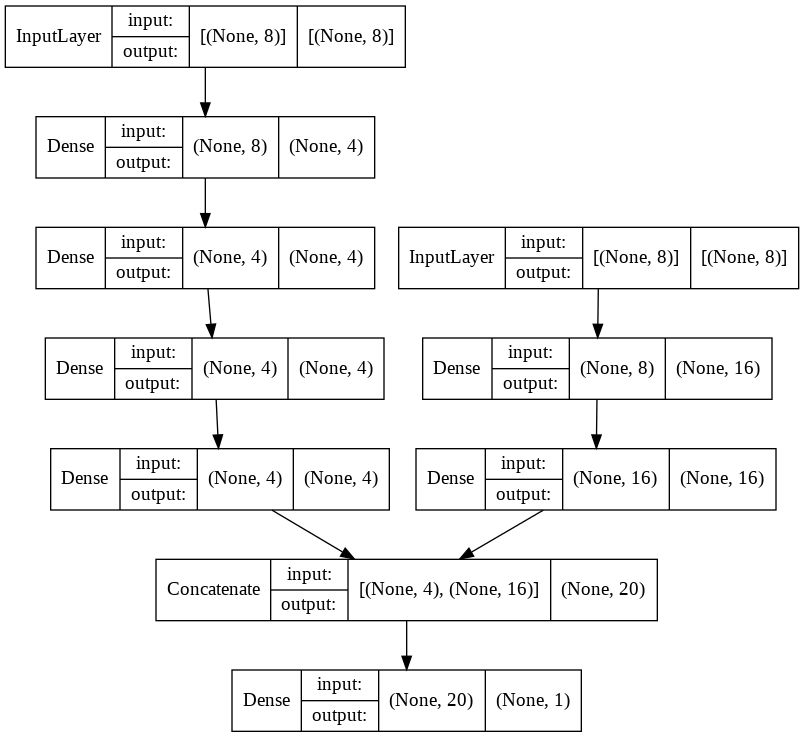

In [14]:
plot_model(model, show_layer_names = False, show_shapes = True)

In [15]:
opt = Adam(learning_rate=1e-2, decay=1e-3 / 200)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])

In [16]:
model.fit( x=[X_train, X_train],
          y=y_train,
          validation_split = 0.2,
          epochs=10, batch_size=64 )

Epoch 1/10
181/181 [==============================] - 2s 5ms/step - loss: 4.6189 - mean_absolute_error: 4.6189 - val_loss: 0.8783 - val_mean_absolute_error: 0.8783
Epoch 2/10
181/181 [==============================] - 1s 3ms/step - loss: 1.0775 - mean_absolute_error: 1.0775 - val_loss: 0.7637 - val_mean_absolute_error: 0.7637
Epoch 3/10
181/181 [==============================] - 0s 3ms/step - loss: 0.8724 - mean_absolute_error: 0.8724 - val_loss: 1.0729 - val_mean_absolute_error: 1.0729
Epoch 4/10
181/181 [==============================] - 0s 2ms/step - loss: 0.9007 - mean_absolute_error: 0.9007 - val_loss: 1.1074 - val_mean_absolute_error: 1.1074
Epoch 5/10
181/181 [==============================] - 0s 2ms/step - loss: 0.7187 - mean_absolute_error: 0.7187 - val_loss: 0.7975 - val_mean_absolute_error: 0.7975
Epoch 6/10
181/181 [==============================] - 0s 2ms/step - loss: 0.8073 - mean_absolute_error: 0.8073 - val_loss: 0.9664 - val_mean_absolute_error: 0.9664
Epoch 7/10
181/1

In [17]:
y_pred = model.predict([X_test, X_test])

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9301476529497154

In [19]:
mean_absolute_percentage_error(y_pred, y_test)

0.33501621830814077

In [20]:
np.var(np.abs(y_test-y_pred))

0.7967364005368353

In [21]:
network_1

In [22]:
network_2

In [23]:
model